In [1]:
from joblib import dump, load
import pandas as pd

In [2]:
df = pd.read_parquet('./data/data_df_hcm.parquet')
target_df = pd.read_parquet('./data/target_df_hcm.parquet')


In [7]:
import json

FS = json.load(open('./data/full_version.json', 'r'))
cat_cols = FS['cat_cols']
num_cols = FS['num_cols']
all_cols =  num_cols

df = df[all_cols]

In [5]:
df

,nearest_5_district,nearest_8_street,nearest_2_ward,nearest_4_district,nearest_1_district,typeOfRealEstate,houseDirection,nearest_5_street,nearest_7_street,street,...,num_of_parking_entrance_in_500m_radius,num_of_hospital_in_1000m_radius,distance_hn_CongtruongLamSon,distance_hn_DuongNguyenHuequan1TPHCM,nearest_4_lat,num_of_atm_in_2000m_radius,num_of_place_of_worship_in_2000m_radius,num_of_restaurant_in_1000m_radius,numberOfBathRooms,distance_hn_DuongNamKyKhoiNghia
24794,11,1730,13,11,11,3,0,857,756,253,...,0,6,7.647704,7.771465,10.790462,106,98,97,4.478184,7.835349
37176,10,2986,547,10,10,3,0,4053,3429,493,...,0,3,8.551525,8.572820,10.786360,35,72,15,4.478184,8.578963
6905,11,100,518,11,11,3,0,495,100,2252,...,0,6,7.143411,6.899570,10.766617,129,109,303,4.478184,6.688504
6412,10,3640,438,14,14,0,1,3062,1479,1551,...,0,1,8.428535,8.488024,10.803249,58,48,13,2.000000,8.519420
24436,18,1998,28,18,18,1,4,208,2642,219,...,0,0,8.776880,8.799135,10.799805,7,9,9,3.000000,8.820474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,1,357,116,1,1,1,0,3299,506,153,...,0,1,8.728899,8.680754,10.736959,9,2,3,2.000000,8.654018
22001,20,963,30,14,20,3,0,91,311,30,...,0,6,8.216211,8.298848,10.805246,57,55,15,5.000000,8.345146
21481,13,2268,399,13,13,1,7,2372,1469,2733,...,0,0,9.479880,9.503459,10.886026,3,1,0,1.000000,9.516926
10914,10,599,140,30,10,3,0,3708,3451,1047,...,0,1,8.967848,8.989615,10.805946,17,12,3,4.478184,8.998477


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(df)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,31.767042,294.968460,38.295625,-17.426276
1,-53.007139,-26.942174,49.015551,-46.492896
2,-13.392336,694.321975,-87.056768,27.020255
3,-102.007267,-26.398235,32.479103,-10.178701
4,-79.657110,-125.694230,-33.943802,16.842156


In [16]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
distance_hn_CongviennuocDamSen,0.000082,-0.000541,-0.007537,0.004923
distance_hn_NguyenThiThap,0.000051,-0.001094,-0.000603,0.000509
num_of_police_in_2000m_radius,-0.000192,0.015652,-0.002123,-0.002667
distance_hn_KinhDuongVuong,0.000060,-0.000192,-0.003751,0.001944
num_of_place_of_worship_in_1000m_radius,-0.000867,0.034137,0.094519,-0.090556
...,...,...,...,...
num_of_atm_in_2000m_radius,-0.001536,0.147273,0.086153,-0.079067
num_of_place_of_worship_in_2000m_radius,-0.002895,0.115477,0.337125,-0.298206
num_of_restaurant_in_1000m_radius,-0.000156,0.253081,-0.319080,0.198811
numberOfBathRooms,0.000423,0.001227,0.006001,0.006381


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

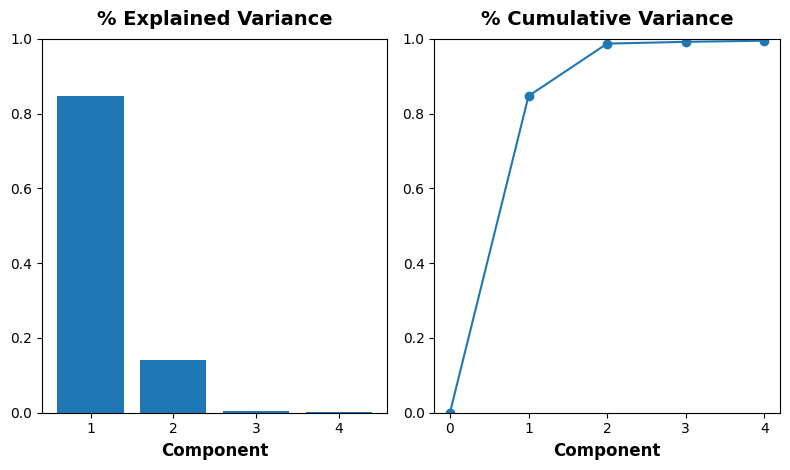

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca)

In [20]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [22]:
y = target_df['target']
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.857045
PC1    0.840960
PC3    0.598641
PC4    0.514739
Name: MI Scores, dtype: float64

In [ ]:
full_df = pd.concat([df, target_df['target']], axis = 1)

In [ ]:
train_df = full_df.iloc[:-35000]
test_df = full_df.iloc[-35000:]

In [ ]:
def train_test_split_by_col(train_df, test_df, X_cols, y_col):
    X_train, X_test, y_train, y_test = train_df[X_cols], test_df[X_cols], train_df[y_col], test_df[y_col]

    return X_train, X_test, y_train, y_test


In [ ]:
target_feature = 'target'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split_by_col(train_df = train_df, test_df = test_df, X_cols = all_cols, y_col = target_feature)

In [ ]:
load_model = load("./model/hcm/cat/v1/model.joblib")
y_pred_test = load_model.predict(X_test)

In [ ]:
full_df[target_feature]

24794    450.000000
37176    176.000000
6905     406.250000
6412      69.863014
24436    185.000000
            ...    
2697      96.250000
22001    123.595506
21481     51.875000
10914    257.352941
7477     100.000000
Name: target, Length: 44209, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y_pred_test, y_test):
    return mean_squared_error(y_test, y_pred_test, squared = False)

rmse(y_pred_test, y_test)

68.13228307347163

In [ ]:
import matplotlib.pylab as plt

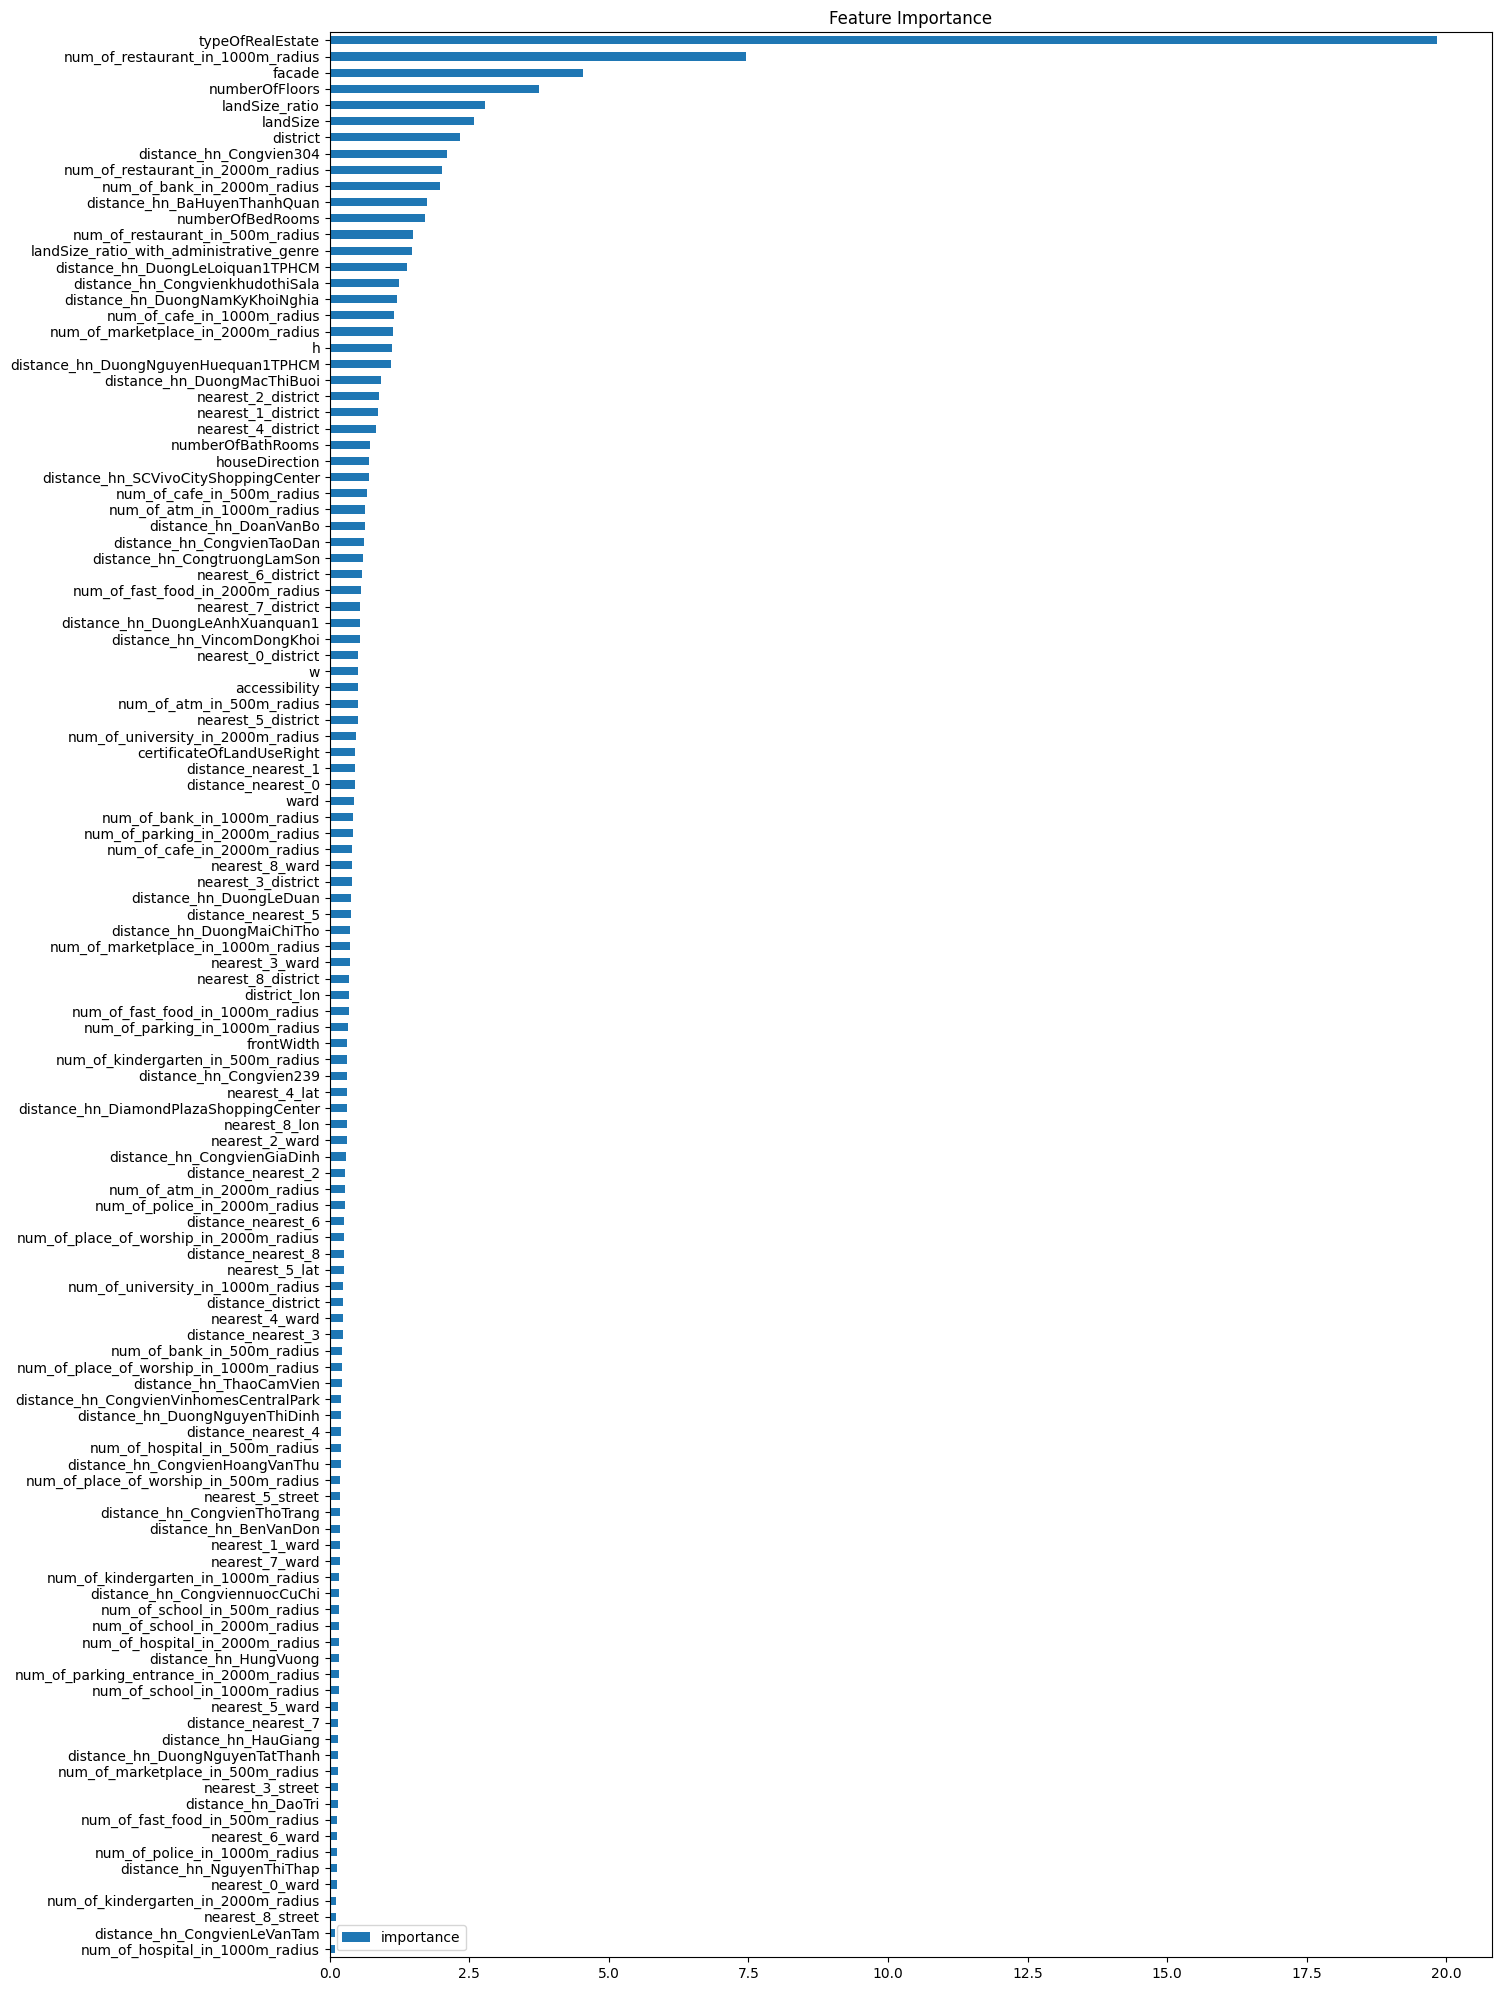

In [ ]:
fi = pd.DataFrame(index=load_model.feature_names_)
fi['importance'] = load_model.feature_importances_
fi.loc[fi['importance'] > 0.1].sort_values('importance').plot(kind='barh', figsize=(15, 25), title='Feature Importance')
plt.show()

In [ ]:
fi = fi.loc[fi['importance'] > 0.1].sort_values('importance')
fi.tail(25)

,importance
nearest_4_district,0.832822
nearest_1_district,0.872974
nearest_2_district,0.883858
distance_hn_DuongMacThiBuoi,0.918600
distance_hn_DuongNguyenHuequan1TPHCM,1.090357
h,1.115853
num_of_marketplace_in_2000m_radius,1.140430
num_of_cafe_in_1000m_radius,1.158393
distance_hn_DuongNamKyKhoiNghia,1.203704
distance_hn_CongvienkhudothiSala,1.233482


/tmp/ipykernel_2260239/1459500746.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['num_of_restaurant_in_2000m_radius'], color='blue', kde=True)


<Axes: ylabel='Density'>

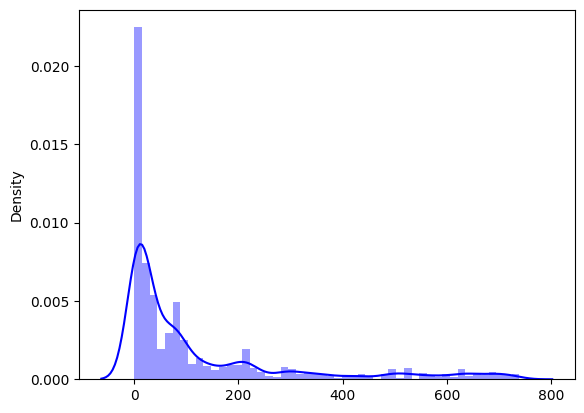

In [ ]:
import seaborn as sns
sns.distplot(x=df['num_of_restaurant_in_2000m_radius'], color='blue', kde=True)

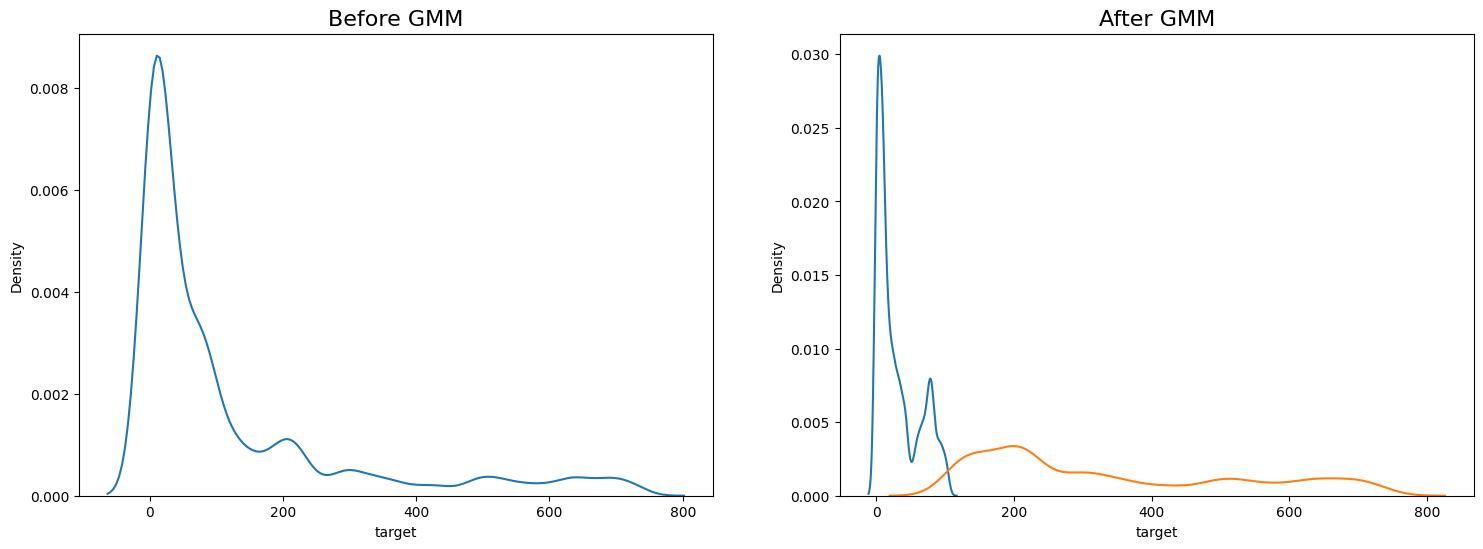

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_restaurant_in_2000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_restaurant_in_2000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_restaurant_in_2000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()

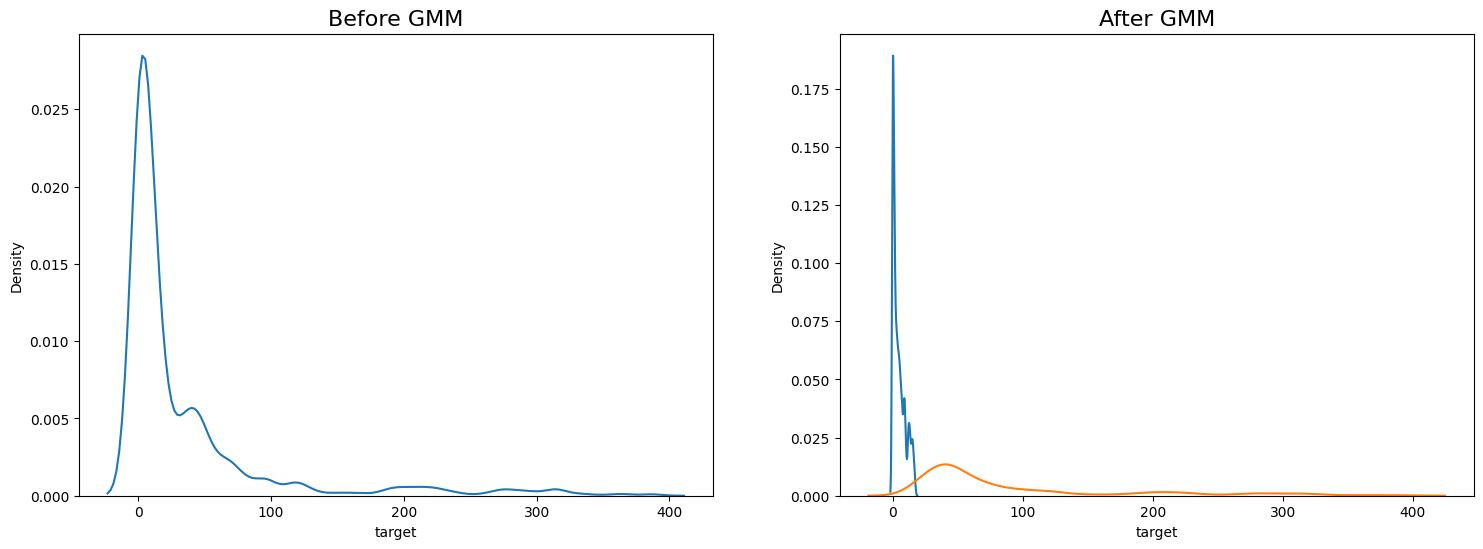

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_restaurant_in_1000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_restaurant_in_1000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_restaurant_in_1000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])
ax[1].set_title('After GMM', fontsize=16)
plt.show()

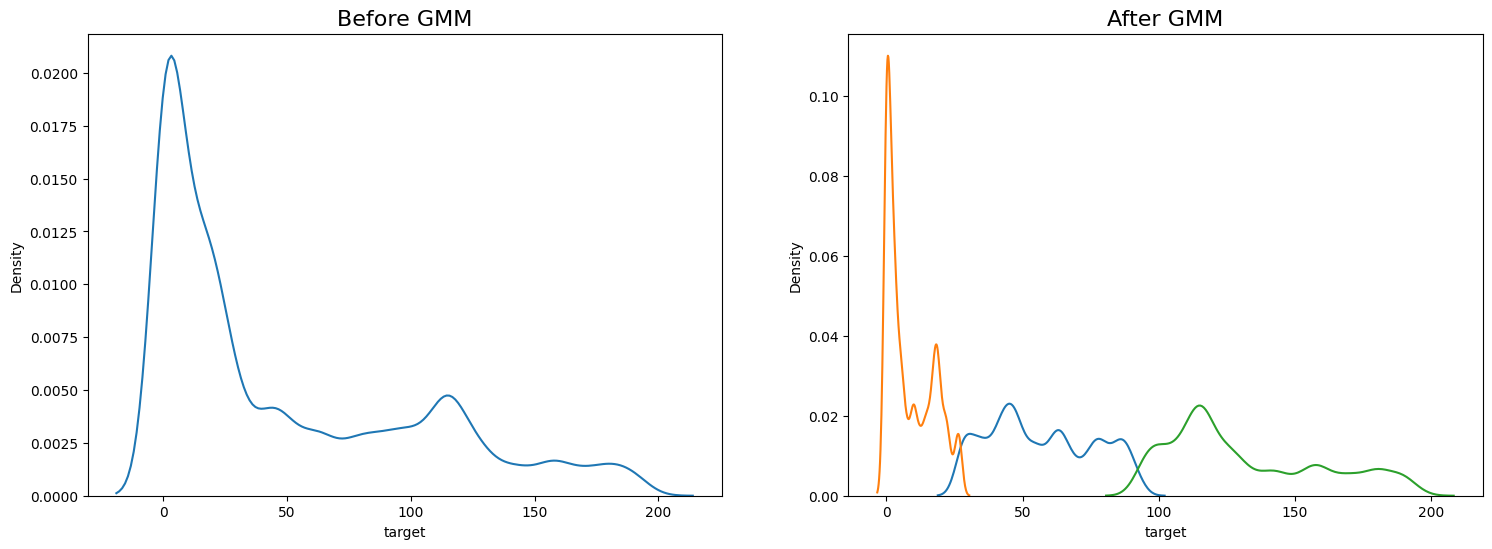

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)

gmm.fit(df['num_of_bank_in_2000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_bank_in_2000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_bank_in_2000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 2]['target'], label='Component 2', ax=ax[1])

ax[1].set_title('After GMM', fontsize=16)
plt.show()

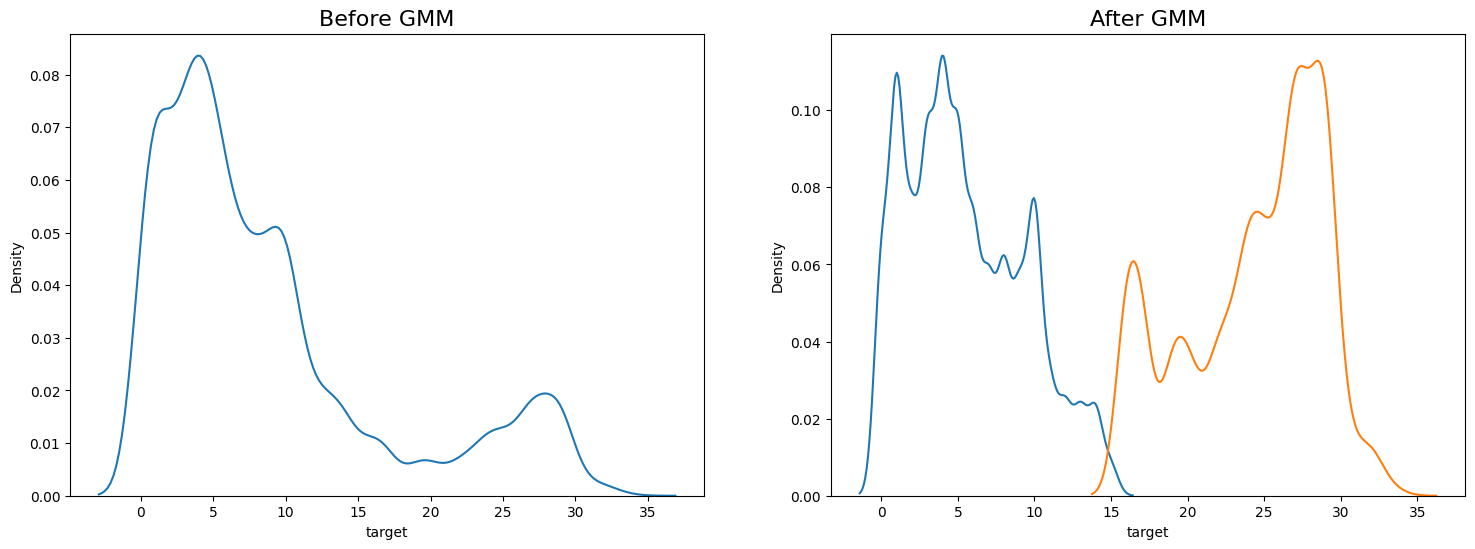

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_marketplace_in_2000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_marketplace_in_2000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_marketplace_in_2000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])

ax[1].set_title('After GMM', fontsize=16)
plt.show()

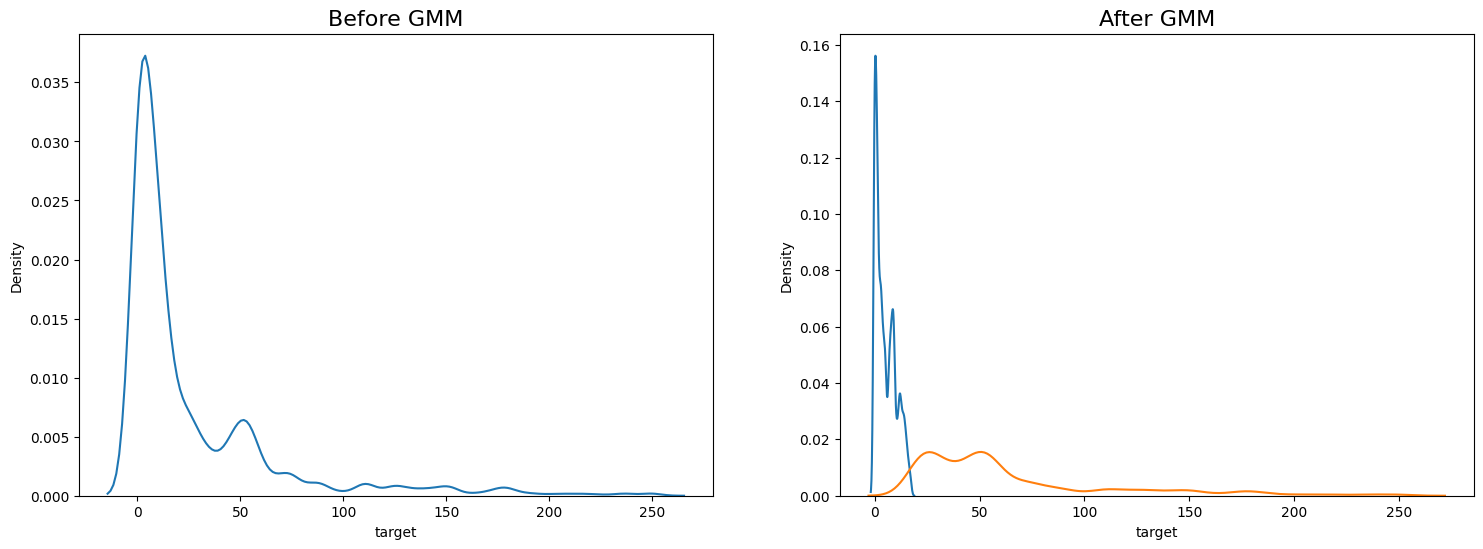

In [ ]:
gmm = GaussianMixture(n_components=2, random_state=42)

gmm.fit(df['num_of_cafe_in_1000m_radius'].values.reshape(-1, 1))

stat_df = pd.DataFrame()
stat_df['target'] = df['num_of_cafe_in_1000m_radius']
stat_df['pred'] = gmm.predict(df['num_of_cafe_in_1000m_radius'].values.reshape(-1, 1))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.kdeplot(data=stat_df['target'], ax=ax[0])
ax[0].set_title('Before GMM', fontsize=16)
sns.kdeplot(data=stat_df[stat_df['pred'] == 0]['target'], label='Component 1', ax=ax[1])
sns.kdeplot(data=stat_df[stat_df['pred'] == 1]['target'], label='Component 2', ax=ax[1])

ax[1].set_title('After GMM', fontsize=16)
plt.show()

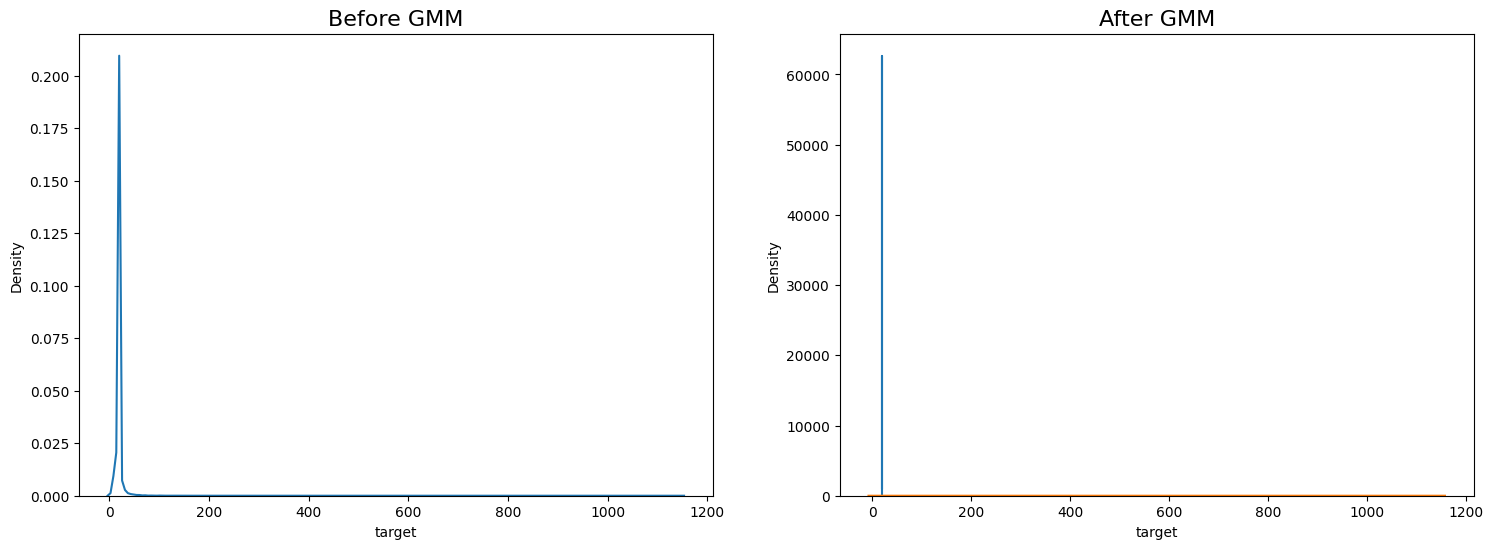